#### Extra graphs

In [ ]:
import os
import subprocess
import datetime
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import functions as F
from pyspark.sql.types import *

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [1]:
spark.conf.set("spark.sql.repl.eagerEval.enabled",True)

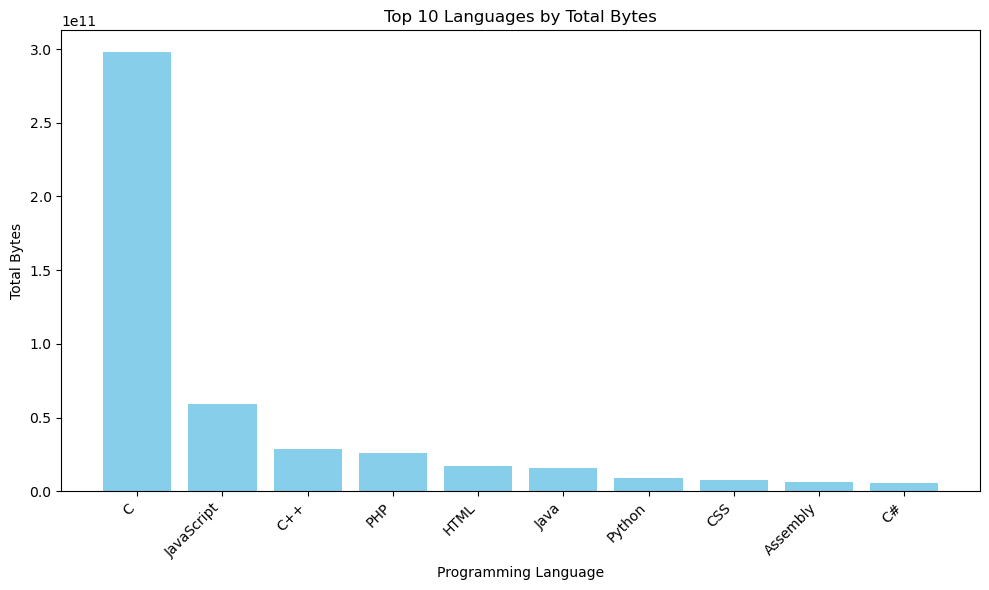

In [4]:
from pyspark.sql.functions import sum
import matplotlib.pyplot as plt

# Group by language_name and sum the language_bytes
df_most_used = df_lang_sample.groupBy("language_name").agg(sum("language_bytes").alias("total_bytes"))

# Order by total_bytes in descending order and get the top 10 languages
df_top_10 = df_most_used.orderBy("total_bytes", ascending=False).limit(10)

# Convert the Spark DataFrame to Pandas for easy plotting
df_top_10_pd = df_top_10.toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(df_top_10_pd['language_name'], df_top_10_pd['total_bytes'], color='skyblue')
plt.title('Top 10 Languages by Total Bytes')
plt.xlabel('Programming Language')
plt.ylabel('Total Bytes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
df_lang_time_sample = spark.read.parquet("gs://msca-bdp-students-bucket/notebooks/aadyanair/lang_time_sample.parquet")

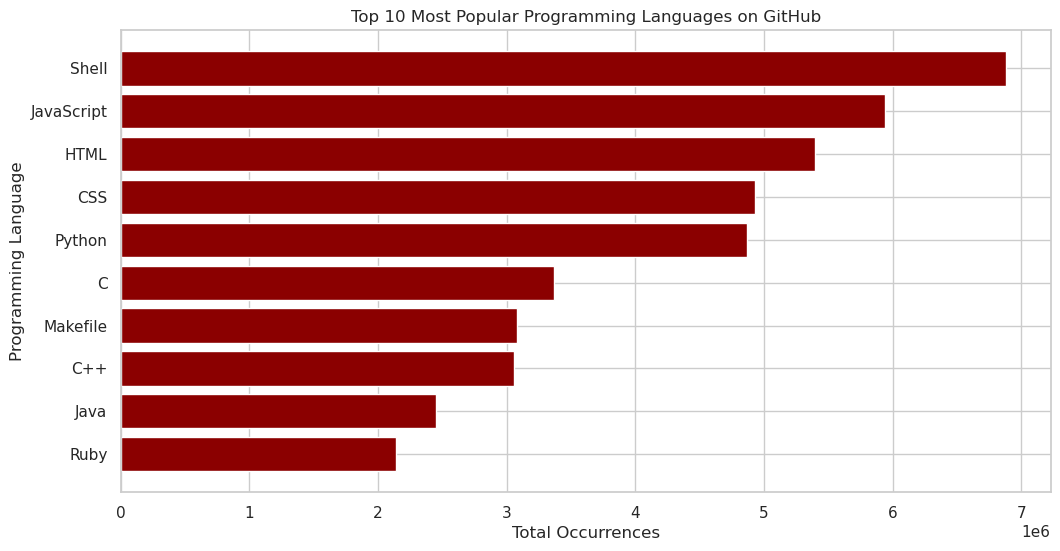

In [11]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Group by language_name and count the occurrences of each language
language_counts = (
    df_lang_time_sample.groupBy("language_name")
    .agg(F.count("*").alias("total_occurrences"))
)

# Convert the Spark DataFrame to Pandas for easy plotting
language_counts_pd = language_counts.toPandas()

# Sort the counts in descending order and select the top 10 languages
top_10_languages = language_counts_pd.sort_values(by="total_occurrences", ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_10_languages["language_name"], top_10_languages["total_occurrences"], color='darkred')
plt.xlabel("Total Occurrences")
plt.ylabel("Programming Language")
plt.title("Top 10 Most Popular Programming Languages on GitHub")
plt.gca().invert_yaxis()  # Invert the y-axis so the most popular is at the top
plt.show()


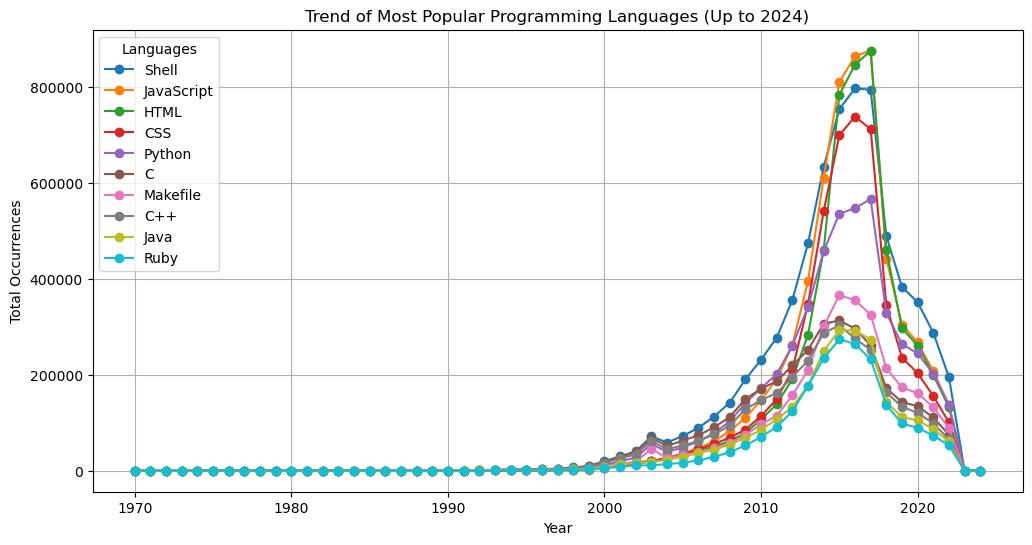

In [5]:
from pyspark.sql import functions as F
import matplotlib.pyplot as plt

# Filter the dataset to include only records up to 2024
df_filtered = df_lang_time_sample.filter(df_lang_time_sample.year <= 2024)

# Group by year and language_name and count the occurrences
language_trends = (
    df_filtered.groupBy("year", "language_name")
    .agg(F.count("*").alias("total_occurrences"))
)

# Convert to Pandas for easier plotting
language_trends_pd = language_trends.toPandas()

# Pivot the table to have years as rows, languages as columns, and occurrences as values
language_trends_pivot = language_trends_pd.pivot(index="year", columns="language_name", values="total_occurrences")

# Fill NaN with 0s for languages that were not used in a particular year
language_trends_pivot = language_trends_pivot.fillna(0)

# Plot the trends for the top languages (filter out the ones with low counts for clarity)
top_languages = language_trends_pivot.sum().sort_values(ascending=False).head(10).index
language_trends_pivot[top_languages].plot(kind="line", figsize=(12, 6), marker='o')

plt.title("Trend of Most Popular Programming Languages (Up to 2024)")
plt.xlabel("Year")
plt.ylabel("Total Occurrences")
plt.legend(title="Languages")
plt.grid(True)
plt.show()


In [4]:
df_license_sample = spark.read.parquet("gs://msca-bdp-students-bucket/notebooks/aadyanair/Final Project/license_sample.parquet")

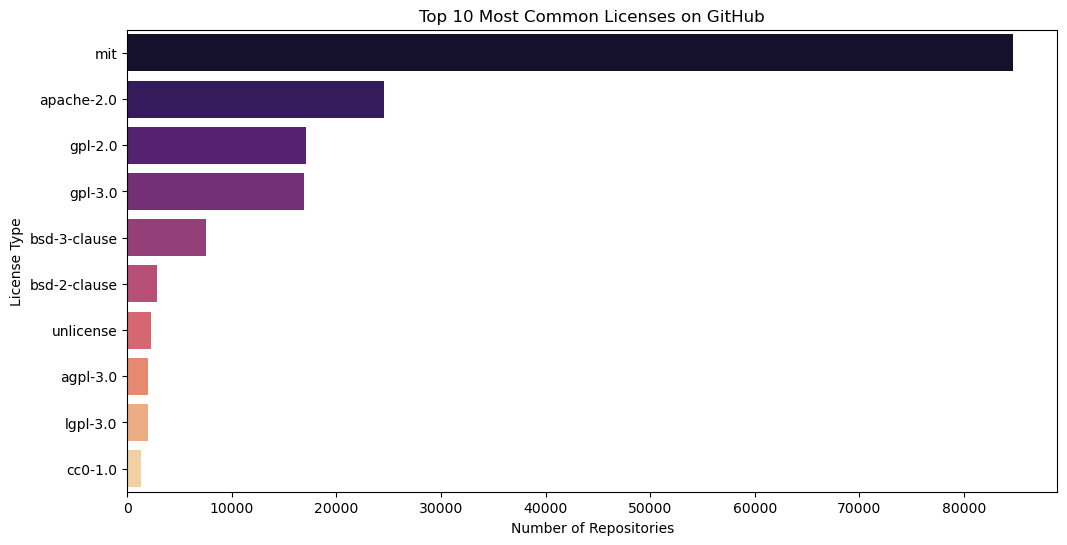

In [8]:
license_distribution = df_license_sample.groupBy("license").count()
license_distribution_pd = license_distribution.orderBy(F.desc("count")).limit(10).toPandas()

plt.figure(figsize=(12,6))
sns.barplot(data=license_distribution_pd, y="license", x="count", palette="magma")
plt.xlabel("Number of Repositories")
plt.ylabel("License Type")
plt.title("Top 10 Most Common Licenses on GitHub")
plt.show()

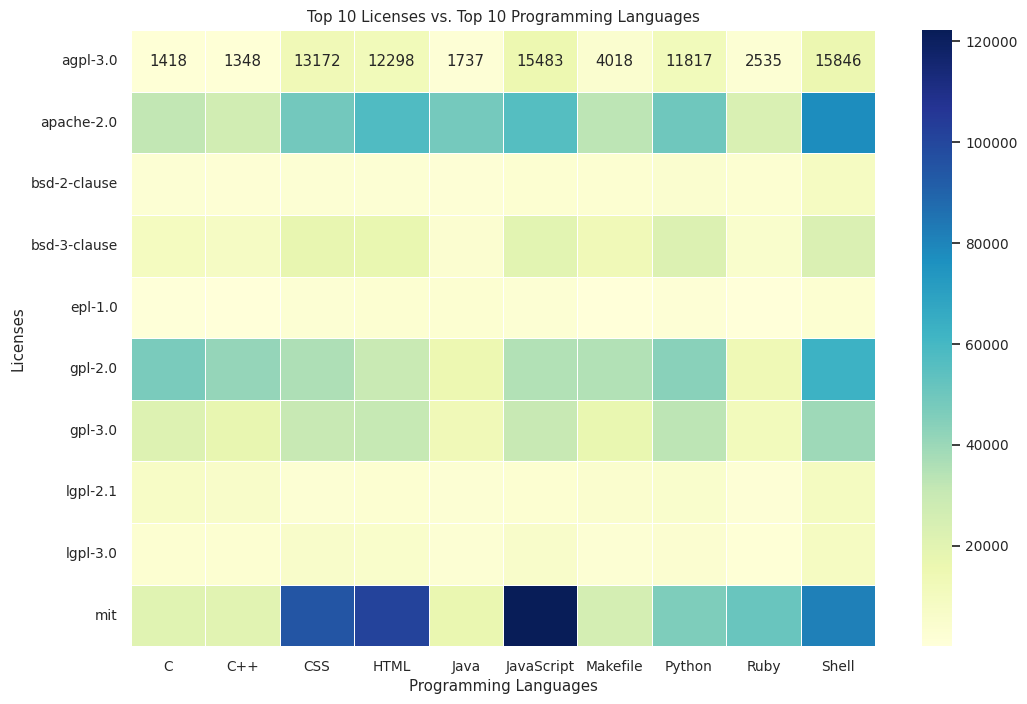

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Join df_lang_time_sample and df_license_sample on 'repo_name'
license_language_df = df_lang_time_sample.join(df_license_sample, "repo_name")

# Step 2: Group by license and language_name, and count the occurrences
license_language_counts = license_language_df.groupBy("license", "language_name").count()

# Convert the result to pandas DataFrame
df_pandas = license_language_counts.toPandas()

# Step 3: Filter for the top 10 licenses and top 10 languages
top_licenses = df_pandas.groupby("license")["count"].sum().nlargest(10).index
top_languages = df_pandas.groupby("language_name")["count"].sum().nlargest(10).index

# Filter the DataFrame to include only top 10 licenses and languages
df_filtered = df_pandas[df_pandas["license"].isin(top_licenses) & df_pandas["language_name"].isin(top_languages)]

# Step 4: Create a heatmap to visualize the license distribution across languages
heatmap_data = df_filtered.pivot(index="license", columns="language_name", values="count").fillna(0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.set(font_scale=0.9)
ax = sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)

plt.title("Top 10 Licenses vs. Top 10 Programming Languages")
plt.xlabel("Programming Languages")
plt.ylabel("Licenses")
plt.show()



In [9]:
styled_df = df_filtered.head(10).style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', '#f5f5f5'), ('font-weight', 'bold')]}, 
     {'selector': 'tbody td', 'props': [('background-color', '#ffffff')]}, 
     {'selector': 'table', 'props': [('border-collapse', 'collapse'), ('width', '100%')]}, 
     {'selector': 'thead th, tbody td', 'props': [('border', '1px solid #ddd'), ('padding', '8px')]}
    ]
)

styled_df.hide(axis="index")
styled_df

license,language_name,count
mit,Shell,81568
gpl-2.0,HTML,29768
gpl-2.0,Python,43791
gpl-3.0,Makefile,16962
gpl-2.0,Ruby,13845
apache-2.0,JavaScript,56100
lgpl-2.1,Makefile,4381
lgpl-2.1,Java,2798
bsd-3-clause,HTML,16967
gpl-3.0,C,22002


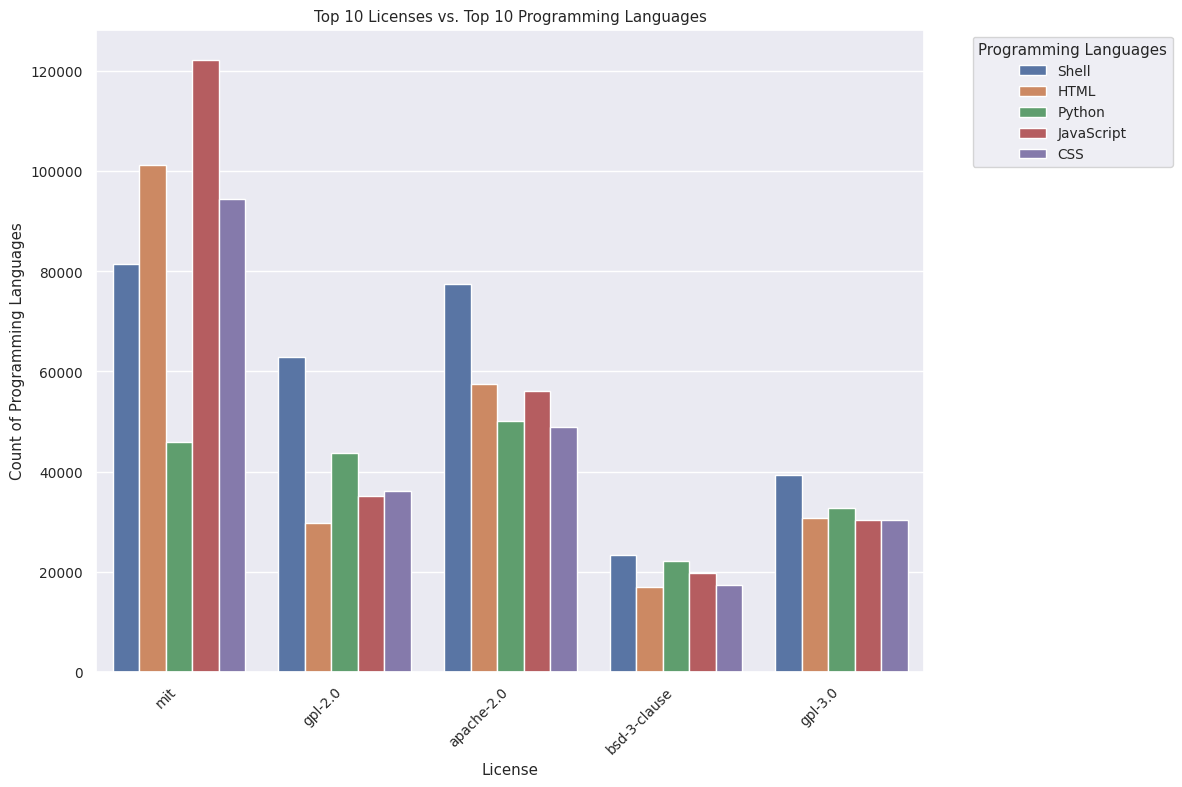

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Join df_lang_time_sample and df_license_sample on 'repo_name'
license_language_df = df_lang_time_sample.join(df_license_sample, "repo_name")

# Step 2: Group by license and language_name, and count the occurrences
license_language_counts = license_language_df.groupBy("license", "language_name").count()

# Convert the result to pandas DataFrame
df_pandas = license_language_counts.toPandas()

# Step 3: Filter for the top 10 licenses and top 10 languages
top_licenses = df_pandas.groupby("license")["count"].sum().nlargest(5).index
top_languages = df_pandas.groupby("language_name")["count"].sum().nlargest(5).index

# Filter the DataFrame to include only top 10 licenses and languages
df_filtered = df_pandas[df_pandas["license"].isin(top_licenses) & df_pandas["language_name"].isin(top_languages)]

# Step 4: Plotting
plt.figure(figsize=(12, 8))

# Create a bar plot with license on x-axis, language on y-axis, and count as the size
sns.barplot(data=df_filtered, x="license", y="count", hue="language_name", dodge=True)

plt.title("Top 10 Licenses vs. Top 10 Programming Languages")
plt.xlabel("License")
plt.ylabel("Count of Programming Languages")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Programming Languages", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [12]:
df_commits = spark.read.parquet("gs://msca-bdp-students-bucket/notebooks/aadyanair/Final Project/commits_sample.parquet")

In [13]:
from pyspark.sql.functions import col, year, from_unixtime, lag
from pyspark.sql.window import Window
import pyspark.sql.functions as F  
df_commits = df_commits.withColumn("year", year(from_unixtime(col("author_time_sec"))))

# Filter to only include years up to 2024
df_commits = df_commits.filter(col("year") <= 2024)

# Group by repo_name and year to get commit counts
growth_repos = df_commits.groupBy("repo_name", "year").count()

# Define a window specification for calculating growth rate
window_spec = Window.partitionBy("repo_name").orderBy("year")

# Compute the previous year's commit count
growth_repos = growth_repos.withColumn("prev_year_count", lag("count").over(window_spec))

# Compute growth rate
growth_repos = growth_repos.withColumn(
    "growth_rate", ((col("count") - col("prev_year_count")) / col("prev_year_count")).cast("double")
)

In [16]:
from pyspark.sql.functions import col, explode

# Filter for the top 10 repositories by total commit count
top_10_repos = growth_repos.groupBy("repo_name").agg(F.sum("count").alias("total_commits"))

# Sort by total commits and select the top 10
top_10_repos = top_10_repos.orderBy(col("total_commits"), ascending=False).limit(10)

# Collect the top 10 repositories into a list
top_10_repos_list = [row["repo_name"] for row in top_10_repos.collect()]

# Filter df_commits to only include the top 10 repositories
df_top_repos = df_commits.filter(col("repo_name").isin(top_10_repos_list))

# Now you can continue with the technology extraction process
df_top_repos.cache()
df_tech_trends = df_top_repos.withColumn(
    "technologies", extract_tech_udf(col("subject"), col("message"))
)

# Explode the technologies column so each technology is in a separate row
df_tech_flattened = df_tech_trends.withColumn("technology", explode(col("technologies")))

# Group by technology and count the occurrences
df_tech_summary = df_tech_flattened.groupBy("technology").count()

# Convert the result to pandas for easier handling
df_tech_summary_pd = df_tech_summary.toPandas()

# Display the top technologies
df_tech_summary_pd.head()


25/03/15 00:11:30 WARN CacheManager: Asked to cache already cached data.        


,technology,count
0,bugfix,1015
1,crypto,4307
2,driver,74519
3,patch,88253
4,aws,1038


In [18]:
from pyspark.sql.functions import col, explode
from pyspark.sql.types import ArrayType, StringType
from pyspark.sql import functions as F

# Define technology-related keywords for different categories
tech_keywords = {
    "AI": ["AI", "artificial-intelligence", "deep learning", "neural network"],
    "ML": ["ML", "machine learning", "data science", "supervised learning", "unsupervised learning"],
    "Blockchain": ["blockchain", "crypto", "cryptocurrency", "bitcoin", "ethereum"],
    "Cloud": ["cloud", "aws", "azure", "google-cloud", "serverless"],
    "NLP": ["NLP", "natural language processing", "text mining", "text analysis"],
    "DevOps": ["devops", "ci/cd", "continuous integration", "continuous delivery"],
    "Hardware": ["cpu", "memory", "hardware", "driver", "build", "device", "processor"],
    "Others": ["update", "bugfix", "fix", "patch", "merge"]
}

# Extract the technology names from the subject and message
def extract_technologies(subject, message):
    combined_text = f"{subject} {message}"
    technologies = set()  # To store unique technologies found
    
    for keywords in tech_keywords.values():
        for keyword in keywords:
            if keyword.lower() in combined_text.lower():
                technologies.add(keyword.lower())  # Add to the set (avoid duplicates)
    
    return list(technologies)

# Create a UDF to apply the technology extraction function
extract_tech_udf = udf(lambda subject, message: extract_technologies(subject, message), ArrayType(StringType()))

# Ensure top_10_repos is defined before using it
# Assuming top_10_repos is generated earlier from your commit counts data
top_10_repos_list = [row["repo_name"] for row in top_10_repos.collect()]

# Apply the UDF to the DataFrame for the top 10 repos
df_top_repos = df_commits.filter(col("repo_name").isin(top_10_repos_list))
df_top_repos.cache()

df_tech_trends = df_top_repos.withColumn(
    "technologies", extract_tech_udf(col("subject"), col("message"))
)

# Explode the technologies column so each technology is in a separate row
df_tech_flattened = df_tech_trends.withColumn("technology", explode(col("technologies")))

# Group by technology and count the occurrences
df_tech_summary = df_tech_flattened.groupBy("technology").count()

# Convert the result to pandas for easier handling
df_tech_summary_pd = df_tech_summary.toPandas()

# Display the top technologies
df_tech_summary_pd.head()

25/03/15 00:14:38 WARN CacheManager: Asked to cache already cached data.        


,technology,count
0,bugfix,1015
1,crypto,4307
2,driver,74519
3,patch,88253
4,aws,1038


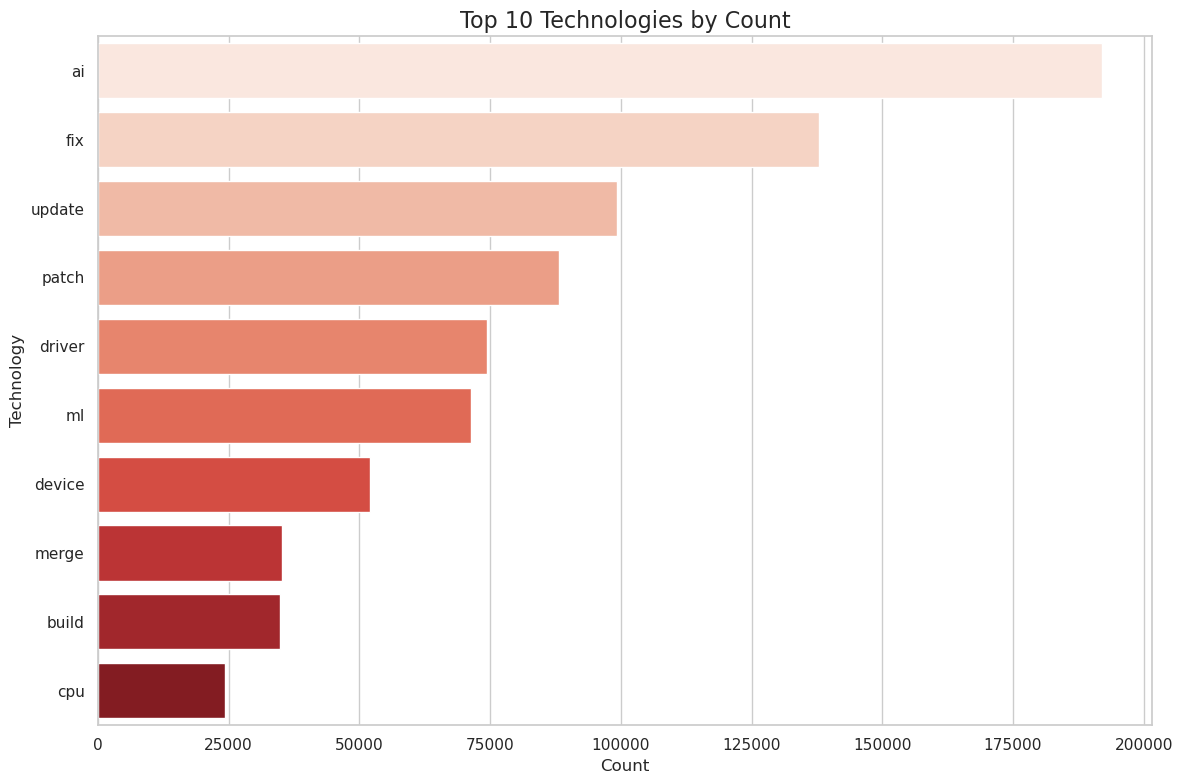

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 technologies by count
df_top_10_tech = df_tech_summary_pd_sorted.head(10)

# Set up the figure size and style
plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")

# Create a barplot
ax = sns.barplot(
    x="count", 
    y="technology", 
    data=df_top_10_tech, 
    palette="Reds"
)

# Add labels and title
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Technology", fontsize=12)
ax.set_title("Top 10 Technologies by Count", fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()


In [2]:
gcs_folder = 'gs://msca-bdp-data-open/final_project_git'

In [3]:
%%time   
    
df_commits = spark.read.parquet(os.path.join(gcs_folder, 'commits'))
print(f'Records read from dataframe *commits*: {df_commits.count():,.0f}')

Records read from dataframe *commits*: 265,419,190
CPU times: user 245 ms, sys: 74.5 ms, total: 320 ms
Wall time: 1min 34s


In [4]:
from pyspark.sql.functions import col, explode

df_expanded = df_commits.select(
    col("author.name").alias("author_name"),
    col("author.email").alias("author_email"),
    col("author.time_sec").alias("author_time_sec"),
    col("committer.name").alias("committer_name"),
    col("committer.email").alias("committer_email"),
    col("commit"),
    col("subject"),
    col("message"),
    explode(col("repo_name")).alias("repo_name") 
)

# Removing rows with null values
df_cleaned = df_expanded.dropna()

# Removing duplicates
df_final = df_cleaned.dropDuplicates()

In [ ]:
import pandas as pd
import scipy.signal as signal
from pyspark.sql.functions import year, from_unixtime, col

# Group by year to get commit counts per year
df_yearly_commits = df_final.groupBy(year(from_unixtime(col("author_time_sec"))).alias("year")).count()

# Filter for years between 2000 and 2024
df_yearly_commits_filtered = df_yearly_commits.filter((col("year") >= 2000) & (col("year") <= 2024))

# Convert to Pandas for easier processing
df_yearly_commits_pd = df_yearly_commits_filtered.toPandas()

# Use find_peaks to detect spikes in commit count
peaks, _ = signal.find_peaks(df_yearly_commits_pd['count'], height=150000)  # Set the threshold for spike detection

# Extract the years and counts where the spikes occurred
spike_years = df_yearly_commits_pd['year'].iloc[peaks]
spike_counts = df_yearly_commits_pd['count'].iloc[peaks]

# Create a DataFrame with spike data
spike_data = pd.DataFrame({'Year': spike_years, 'Count': spike_counts})

# Display the spike data
print(spike_data)

    Year      Count
3   2007  230093949
7   2011  397361729
10  2013  340125551
12  2020   30063544
14  2015  285458643
17  2012  360886413
23  2009  357215053


In [14]:
spike_data.head()

,Date,Count
292,2000-06,429059
125,2001-01,522724
96,2001-03,623957
171,2001-05,582275
60,2001-08,576519


/opt/dataproc/conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/dataproc/conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


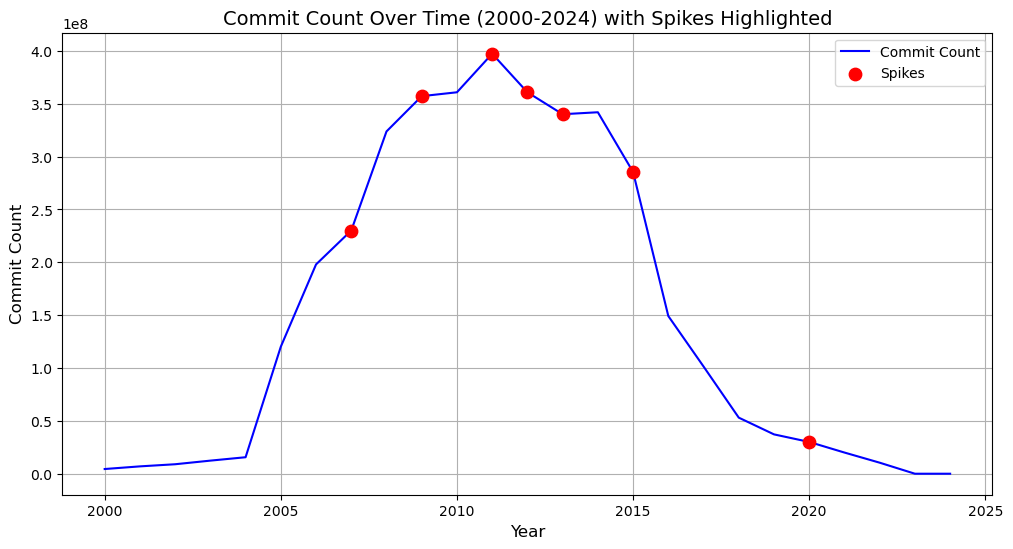

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the commit count over time (from 2000 to 2024)
plt.figure(figsize=(12, 6))

# Plot the overall commit counts per year
sns.lineplot(data=df_yearly_commits_pd, x='year', y='count', label='Commit Count', color='blue')

# Highlight the spikes (commit counts that were detected as spikes)
plt.scatter(spike_years, spike_counts, color='red', label='Spikes', zorder=5, s=80, marker='o')

# Add labels and title
plt.title('Commit Count Over Time (2000-2024) with Spikes Highlighted', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Commit Count', fontsize=12)

# Show legend
plt.legend()

# Show plot with grid
plt.grid(True)

# Display the plot
plt.show()


/opt/dataproc/conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/dataproc/conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


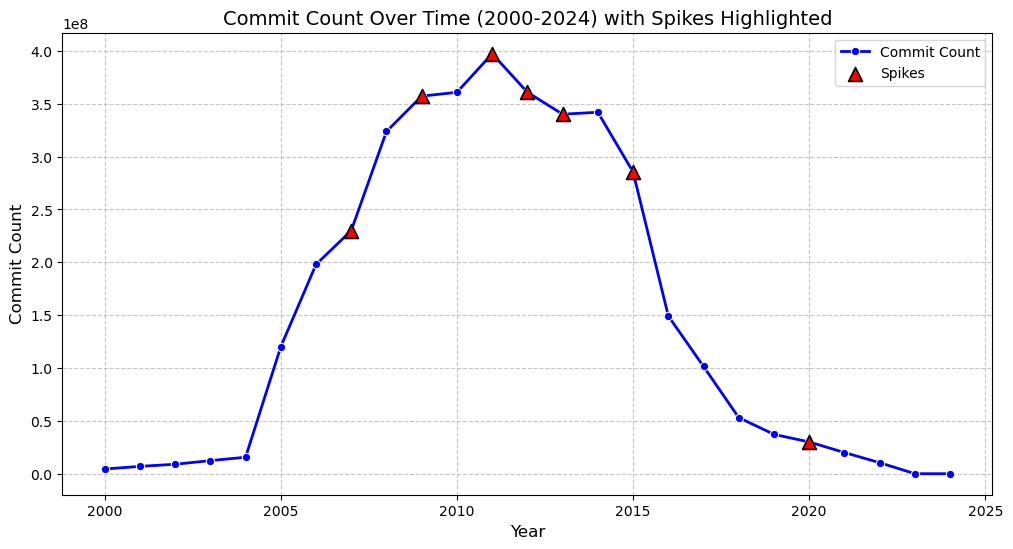

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Plot the overall commit count as a line with markers
sns.lineplot(data=df_yearly_commits_pd, x='year', y='count', label='Commit Count', color='blue', linewidth=2, marker='o', markersize=6)

# Plot the spikes with a more noticeable visual effect
plt.scatter(spike_years, spike_counts, color='red', label='Spikes', zorder=5, s=100, marker='^', edgecolors='black', linewidth=1.2)

# Add labels and title
plt.title('Commit Count Over Time (2000-2024) with Spikes Highlighted', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Commit Count', fontsize=12)

# Show legend
plt.legend()

# Show plot with grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Display the plot
plt.show()
